In [2]:
import sys
sys.path.append('../../')

import numpy as np

from src.mechanism.single_item import SingleItemAuction
from src.game import Game
from src.strategy import Strategy

from src.learner.frank_wolfe import FrankWolfe
from src.learner.poga import POGA
from src.learner.soda import SODA

from src.util.metrics import *

**Setting**
create specific Single Item Auction setting

In [17]:
# parameter mechanism
bidder = ['1']*2
o_space = {'1': [0.0, 1.0]}
a_space = {'1': [0.05, 1.0]}

param_prior = {
    'distribution':'uniform',
    'mu':0.5,
    'sigma':0.15,
    }
param_util = {
    'payment_rule': 'first_price', 
    'tie_breaking': 'random', 
    'utility_type': 'ROI',
    'budget': 1.01,
    }

# parameter approximation game
n = 128
m = 128

# create mechanism
mechanism = SingleItemAuction(bidder, o_space, a_space, param_prior, param_util)

# create approximation game
game = Game(mechanism, n, m)
if not mechanism.own_gradient:
    game.get_utility(mechanism)



own gradient


**Learner**
Specify Learning Algorithm

In [28]:
# parameter learner
max_iter = int(1e4)
tol = 1e-5
stop_criterion = 'dist_euclidean'
steprule_bool = True
eta = 5
beta = 1/20

learner = SODA(max_iter, tol, stop_criterion, steprule_bool, eta, beta)
#learner = FrankWolfe(max_iter, tol, stop_criterion)
#learner = POGA(max_iter, tol, stop_criterion, steprule_bool, eta, beta)

Run Learning Algorithm

In [29]:
#create and initialize strategies
strategies = {}
for i in game.set_bidder:
    strategies[i] = Strategy(i, game)
    strategies[i].initialize('equal')
    #strategies[i].initialize('matrix', {"init_matrix": bne})
    
# run soda
learner.run(mechanism, game, strategies, disable_tqdm=False, print=True)

 57%|███████████▎        | 5.66k/10.0k [01:24<5:01:17, 4.16s/it]

: 

: 

Visualization of the learning process and the final result

In [25]:
def bne_ql(x, N, r):
    if x <= r:
        return r
    else:
        return (N-1)/N*x + 1/N * (r**N)/(x**(N-1))

def bne_roi(x, N, r):
    if x <= r:
        return r
    if N == 2:
        return x/(-np.log(r)+np.log(x)+1)
    elif N == 5:
        return -3*x**4/(r**3 - 4*x**3)

bne = [bne_roi(xi, len(bidder), 0.05) for xi in strategies['1'].o_discr]

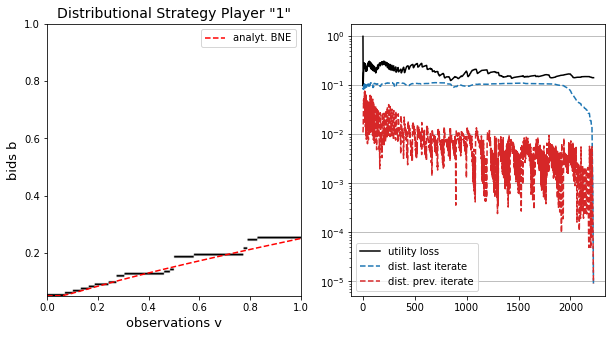

In [27]:
strategies['1'].plot(more=True, beta=bne)